In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from IPython.display import display, Image, clear_output

import sys
sys.path.append("/src/")
from visualization.visualize import print_image_with_point, show_sam_seg_img


In [ ]:
folder_path = "path/to/your/folder/"
image_shape = (1200, 1600)  # Replace with your image shape

input_path = folder_path + "/data/Expl_2_ET_1_2i23-i9-i6_1i-36-37_ET/video_frame_img/"

# evaluation files
eval_path = folder_path + "/data/cyprus_eval_frames.csv"
eval_path_results = folder_path + "/data/cyprus_eval_frames_results.csv"
cyprus_eval_frames_results_predictions = folder_path + "/data/cyprus_eval_frames_results_predictions.csv"
eval_folder_path_seg = folder_path+ "data/eval_results_seg_sam.csv"

In [3]:
df = pd.read_csv(eval_folder_path_seg)

In [4]:
# set label "ambiguous" where the label is Nan
df['label'] = df['label'].fillna("ambiguous")

# drop row with label is fence
df = df[df.label != "fence"]
df = df[df.label != "ambiguous"]

In [5]:
df_sam = df[['session', 'frame_nr', 'GT_Mask_size[px]', 'mask_nr', 'SAM_Precision',
       'Sam_Recall', 'Sam_F1-Score', 'Sam_IoU', 'Sam_Accuracy', 'label']]
            
            
df_seg = df[['session', 'frame_nr', 'GT_Mask_size[px]', 'mask_nr', 'Seg_Total_px',
       'True_prediction_in_mask', 'Seg_recall', 'label']]

# drop if the mask size is 0
df_sam = df_sam[df_sam['GT_Mask_size[px]'] != 0]

### Semantic Segmentation

In [9]:
df_sam.describe()

,frame_nr,GT_Mask_size[px],mask_nr,SAM_Precision,Sam_Recall,Sam_F1-Score,Sam_IoU,Sam_Accuracy
count,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,19438.739437,2.709182e+05,1.274648,0.755103,0.631756,0.550771,0.449876,0.899282
std,5899.136217,3.647530e+05,0.507313,0.297295,0.367197,0.326844,0.316174,0.144740
min,8767.000000,5.640000e+02,1.000000,0.009726,0.000755,0.001509,0.000755,0.191713
25%,14289.500000,1.604325e+04,1.000000,0.634883,0.294962,0.258452,0.148408,0.860435
50%,20300.000000,8.136650e+04,1.000000,0.895621,0.791928,0.613341,0.442419,0.965712
75%,24556.000000,3.896030e+05,1.000000,0.991696,0.960392,0.849094,0.737763,0.996130
max,30745.000000,1.553085e+06,3.000000,1.000000,1.000000,0.992446,0.985005,0.999779


In [11]:
grouped_label = df_seg.groupby('label')['Seg_recall']
grouped_label_mean = grouped_label.mean()
grouped_label_counts = grouped_label.count()
grouped_label_counts_per = grouped_label.count()/len(df_seg)

result = pd.concat([grouped_label_mean, grouped_label_counts, grouped_label_counts_per], axis=1)
result.columns = ['Recall', 'Number', 'Percent']
result

,Recall,Number,Percent
label,,,
building,0.920523,87,0.612676
person,0.998744,4,0.028169
signs,0.223707,10,0.070423
street,0.871692,33,0.232394
vegetation,0.995971,1,0.007042
vehicle,0.855845,7,0.049296


In [25]:
average_recall = df_seg['Seg_recall'].mean()
print(f"Avergae Recall {average_recall}")

std_recall = df_seg['Seg_recall'].std()
print(f"Std {std_recall}")

Avergae Recall 0.8596494520712652
Std 0.2681409066091362


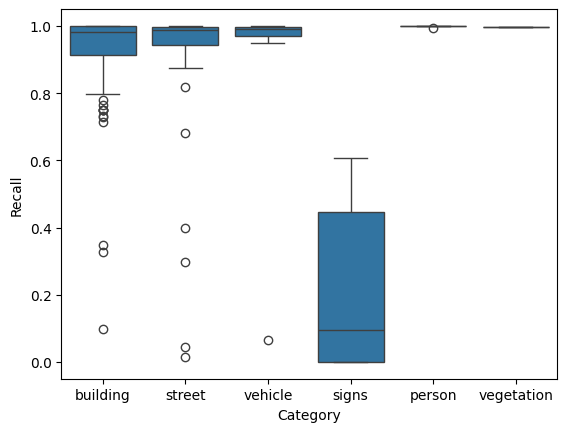

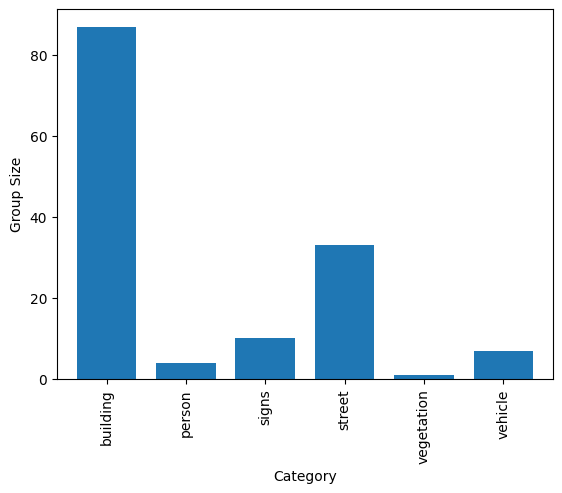

In [26]:
# Investigate on Recall per label 
# Create a list of dataframes for each label
label_dataframes = [grouped_label.get_group(group) for group in grouped_label.groups]

# Plot boxplot for each label
sns.boxplot(data=df_seg, x='label', y='Seg_recall')
plt.xlabel('Category')
plt.ylabel('Recall')
plt.show()

grouped_label.count().plot(kind='bar', width=0.75)
plt.xlabel('Category')
plt.ylabel('Group Size')
plt.show()

/tmp/ipykernel_55299/1945592031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seg['Mask_size[sqrt(px)]'] = df_seg['GT_Mask_size[px]'].apply(lambda x: round(x**0.5, -2))


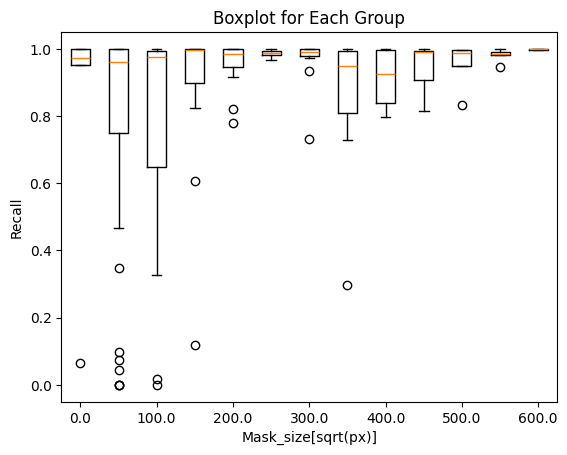

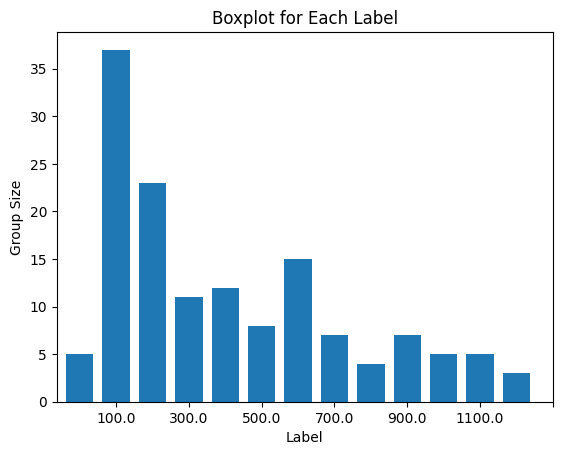

In [39]:
# add a column to the dataframe the rounds the mask size to the nearest 10000
df_seg['Mask_size[sqrt(px)]'] = df_seg['GT_Mask_size[px]'].apply(lambda x: round(x**0.5, -2))

# Group by a new column and calculate recall mean for each group
grouped_new_column = df_seg.groupby('Mask_size[sqrt(px)]')['Seg_recall']
sizes = grouped_new_column.size()


# Create a list of dataframes for each group
group_dataframes = [grouped_new_column.get_group(group) for group in grouped_new_column.groups]

# Plot boxplot for each group
plt.boxplot([df for df in group_dataframes], labels=grouped_new_column.groups)
plt.title('Boxplot for Each Group')
plt.xlabel('Mask_size[sqrt(px)]')
plt.ylabel('Recall')
plt.xticks(range(1, len(grouped_new_column.groups) + 1, 2)) # show only some ticks
plt.show()

grouped_new_column.count().plot(kind='bar', width=0.75)
plt.title('Boxplot for Each Label')
plt.xlabel('Label')
plt.ylabel('Group Size')
plt.xticks(range(1, len(grouped_new_column.groups) + 1, 2)) # show only some ticks
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_55299/440248087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seg['Mask_size[sqrt(px)]'] = df_seg['GT_Mask_size[px]'].apply(lambda x: round(x, -5))


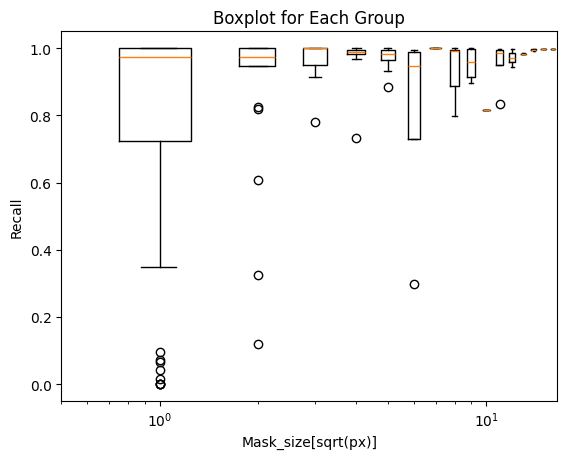

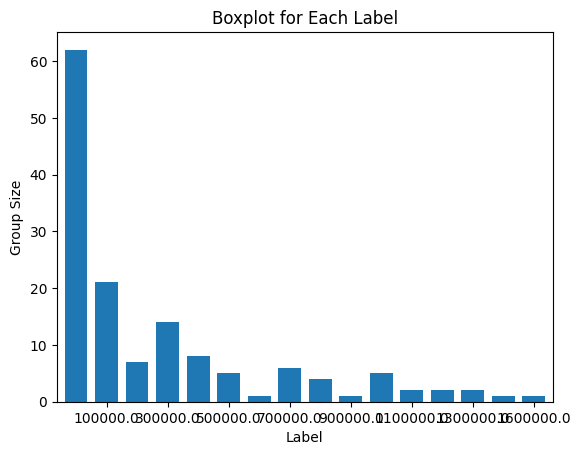

In [50]:
# add a column to the dataframe the rounds the mask size to the nearest 10000
df_seg['Mask_size[sqrt(px)]'] = df_seg['GT_Mask_size[px]'].apply(lambda x: round(x, -5))

# Group by a new column and calculate recall mean for each group
grouped_new_column = df_seg.groupby('Mask_size[sqrt(px)]')['Seg_recall']
sizes = grouped_new_column.size()


# Create a list of dataframes for each group
group_dataframes = [grouped_new_column.get_group(group) for group in grouped_new_column.groups]

# Plot boxplot for each group
plt.boxplot([df for df in group_dataframes], labels=grouped_new_column.groups)
plt.title('Boxplot for Each Group')
plt.xlabel('Mask_size[sqrt(px)]')
plt.ylabel('Recall')
plt.xticks(range(1, len(grouped_new_column.groups) + 1, 2)) # show only some ticks

# show x in log scale
plt.xscale()
plt.show()

grouped_new_column.count().plot(kind='bar', width=0.75)
plt.title('Boxplot for Each Label')
plt.xlabel('Label')
plt.ylabel('Group Size')
plt.xticks(range(1, len(grouped_new_column.groups) + 1, 2)) # show only some ticks
plt.xticks(rotation=0)
plt.show()


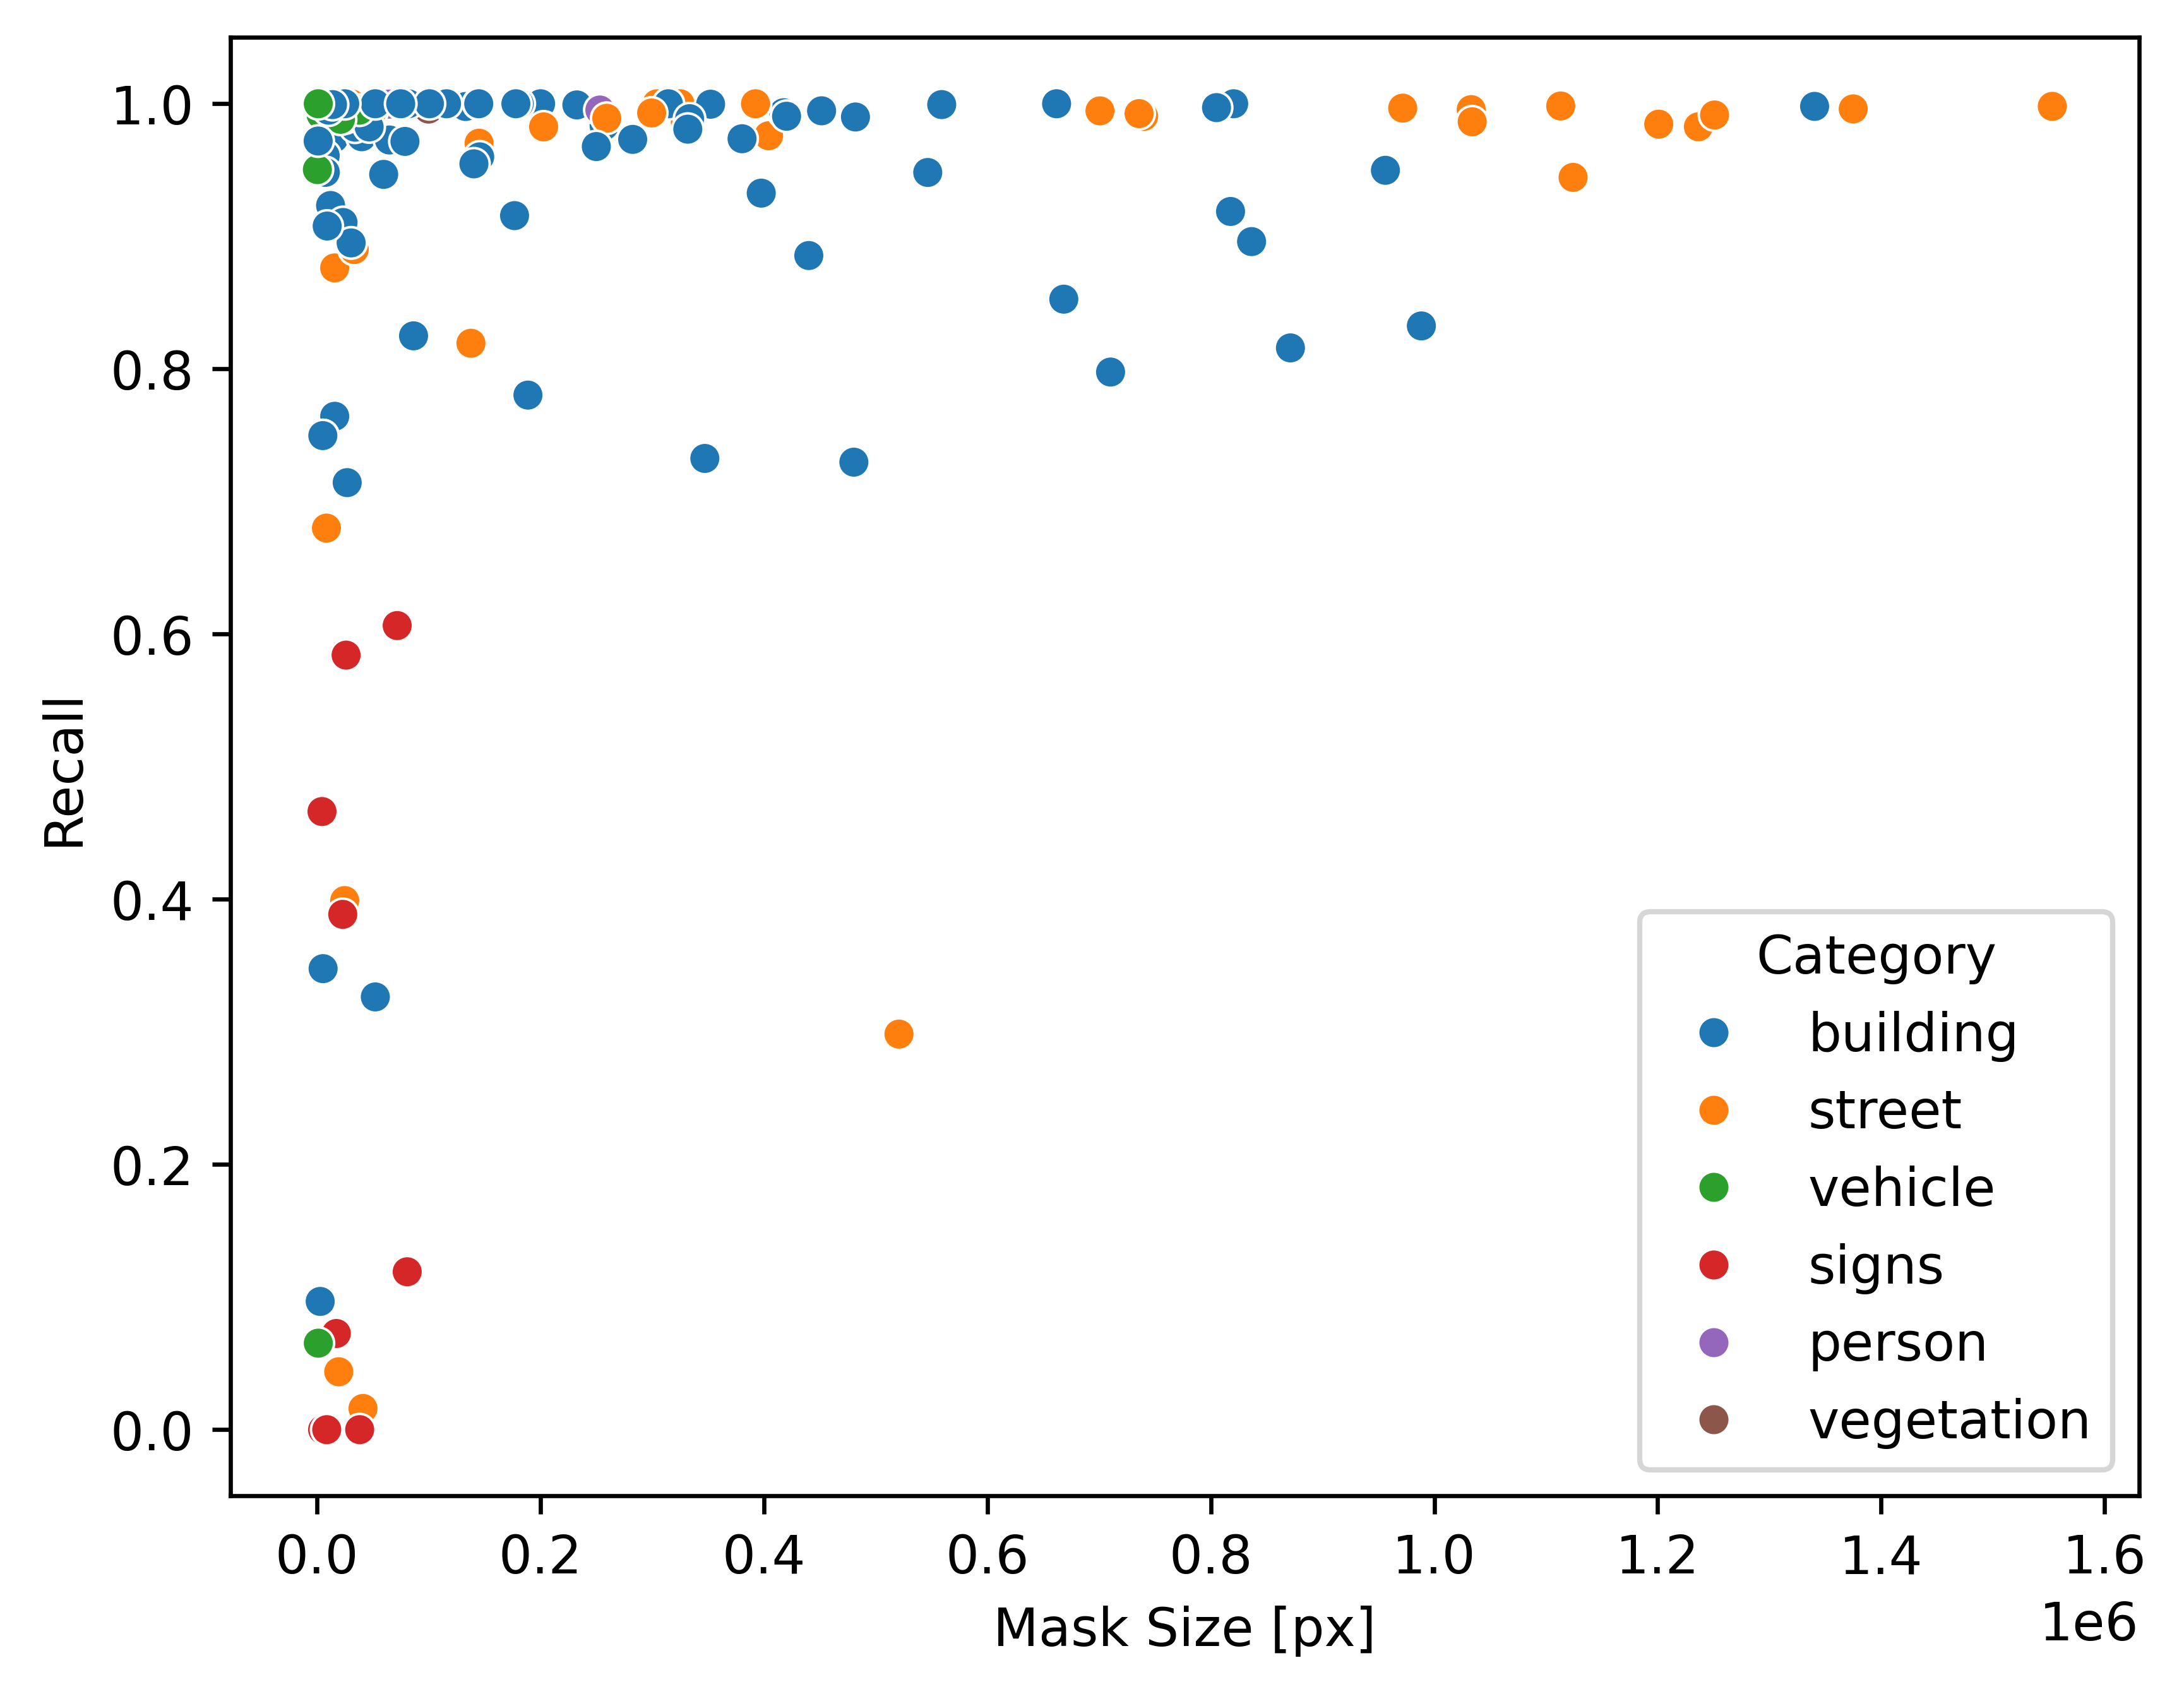

In [66]:
WIDTH = 5
plt.figure(figsize=(WIDTH *1.3, WIDTH), dpi = 600)
sns.scatterplot(data=df_seg, x='GT_Mask_size[px]', y='Seg_recall', hue='label')
plt.xlabel('Mask Size [px]')
plt.ylabel('Recall')
plt.legend(title='Category')

66667.0

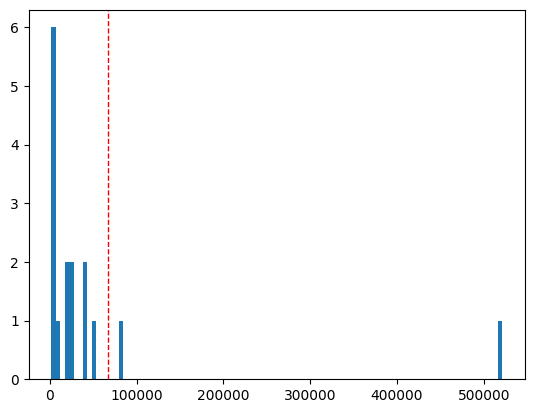

In [87]:
small = df_seg[df.Seg_recall < 0.5]

# show the distribution on the GGT mask size
plt.hist(small['GT_Mask_size[px]'], bins=100)

# mark where 90 % of the data is
plt.axvline(small['GT_Mask_size[px]'].quantile(0.9), color='red', linestyle='dashed', linewidth=1)
# mark where 90 % of the data is
small['GT_Mask_size[px]'].quantile(0.90)